In [2]:
 !wget https://github.com/AlexeyAB/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
 !wget https://pjreddie.com/media/files/yolov3.weights

import cv2 
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
import tensorflow as tf

# Download the COCO dataset labels
url = 'https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names'
urllib.request.urlretrieve(url, 'coco.names')

# Load the pre-trained model
model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet')
model.trainable = False

# Load the object detection model
obj_detector = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')
obj_detector.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
obj_detector.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Define the function for object detection
def detect_objects(image):
    # Convert the image to a blob
    blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)

    # Pass the blob through the object detection model
    obj_detector.setInput(blob)
    detections = obj_detector.forward()

    # Loop through the detections and draw boxes around the objects
    for detection in detections:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            width = int(detection[2] * image.shape[1])
            height = int(detection[3] * image.shape[0])
            left = int(center_x - width/2)
            top = int(center_y - height/2)

            cv2.rectangle(image, (left, top), (left+width, top+height), (0, 255, 0), 2)
            cv2.putText(image, f'{class_id}', (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

--2023-03-03 06:42:49--  https://github.com/AlexeyAB/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/AlexeyAB/darknet/raw/master/cfg/yolov3.cfg [following]
--2023-03-03 06:42:49--  https://github.com/AlexeyAB/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg [following]
--2023-03-03 06:42:49--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


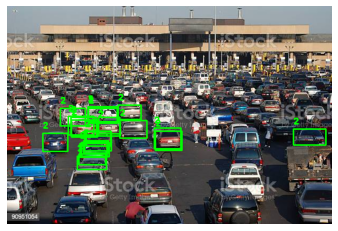

In [19]:
# Download an example image for testing
url = 'https://media.istockphoto.com/id/90951054/photo/us-mexican-border.jpg?s=612x612&w=is&k=20&c=2YK3rDoLnNSIh4p9Yq0zRWwLSYZvpzVDpw8UFOvw9ak='
urllib.request.urlretrieve(url, 'example.jpg')

# Load the example image and perform object detection
image = cv2.imread('example.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = detect_objects(image)

# Display the result
plt.imshow(image)
plt.axis('off')
plt.show()